In [109]:
import pandas as pd
import os
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys

# Filter out warnings
warnings.filterwarnings("ignore")

sys.path.append('../../')

from cool_train.data_loading import correct_column_types

# Additional time features
from cool_train.feature_engineering import add_time_features

In [108]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Dataset

In [69]:
trains_new_dataset = [107, 131, 136, 172, 181, 194]


dict_trains = {}

date_string = '20231207'

main_folder_path = '../../dataset/'

subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir() and date_string in f.name and "tbl_AR41" in f.name]


for jj, subfolder in enumerate(subfolders):
    files = [f.path for f in os.scandir(subfolder) if f.is_file()]
    file_path = files[0]
    raw_data = pd.read_csv(file_path, sep=';')
    dict_trains[trains_new_dataset[jj]] = raw_data

In [179]:
# Chose one Train
df = dict_trains[136]

In [180]:
# Data Casting
df = correct_column_types(df)

# Remove useless columns
useless_cols = ['IsInvalidLine', 'IsTreated', 'ID_Org','id','vehicle_id','Insert_Datetime','mapped_veh_id_Org','Is_Meteo_Retrieved',
                'RS_E_RPM_Delta_Percent','RS_E_OilPress_Delta_Percent', 'RS_E_WatTemp_Delta_Percent','RS_E_InAirTemp_Delta_Percent','RS_T_OilTemp_Delta_Percent'] # Too much NaNs
                
df = df.drop(useless_cols, axis=1)

# Remove Out-of-Range values
df = df[df['OutOfRange_NB_PC1'] == 0]
df = df[df['OutOfRange_NB_PC2'] == 0]
df

,timestamps_UTC,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,...,Distance,IsMoving,MovingSpeed,Slope,VerticalDisplacement,RS_E_InAirTemp_Delta,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta
1594,2023-01-23 22:00:57,51.215928,4.421040,0.5545,19.0,0.0,0.01,0.0,0.0,0.0,...,67.569221,1.0,6.401295,0.147996,0.263158,0.0,0.0,0.0,0.0,0.0
1595,2023-01-23 22:00:59,51.216517,4.420929,0.6195,9.0,0.0,0.01,0.0,0.0,0.0,...,67.192465,1.0,120.946438,-0.148826,-5.000000,0.0,0.0,0.0,0.0,2.0
1596,2023-01-23 22:01:16,51.215910,4.421045,0.5545,19.0,0.0,0.01,0.0,0.0,0.0,...,67.192465,1.0,14.228993,0.148826,0.588235,0.0,0.0,0.0,0.0,1.0
1597,2023-01-23 22:01:19,51.216522,4.420893,0.6195,9.0,0.0,0.01,27.0,32.0,3.0,...,67.569221,1.0,81.083066,-0.147996,-3.333333,5.0,580.0,0.0,0.0,0.0
1598,2023-01-23 22:02:16,51.215882,4.421020,0.5545,19.0,0.0,0.01,35.0,40.0,3.0,...,67.366615,1.0,4.254734,0.148441,0.175439,5.0,576.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374972,2023-09-13 21:45:47,50.936613,5.306404,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,54.643010,1.0,10.928602,0.000000,0.000000,26.0,6.0,0.0,41.0,43.0
374973,2023-09-13 21:46:28,50.936764,5.305734,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,52.087506,1.0,4.573537,0.000000,0.000000,26.0,6.0,0.0,41.0,43.0
374974,2023-09-13 21:46:47,50.936577,5.306441,18.2260,38.0,0.0,0.00,21.0,47.0,0.0,...,54.643010,1.0,10.353412,0.000000,0.000000,26.0,6.0,0.0,41.0,42.0
374975,2023-09-13 21:47:29,50.936786,5.305697,18.2260,38.0,0.0,0.00,21.0,48.0,0.0,...,56.575591,1.0,4.849336,0.000000,0.000000,27.0,6.0,0.0,41.0,43.0


In [181]:
# Drop NaNs
original_rows = len(df)
df_cleaned = df.dropna()
rows_removed = original_rows - len(df_cleaned)
print(f"Number of NaNs rows removed: {rows_removed}")

Number of NaNs rows removed: 0


In [182]:
# Uniform Median-Resampling
df_cleaned = df_cleaned.set_index('timestamps_UTC')
df_cleaned = df_cleaned.resample('1t').median()

# Drop the segments where there is no data
df_cleaned = df_cleaned.dropna(how='all')
df_cleaned 

,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,...,Distance,IsMoving,MovingSpeed,Slope,VerticalDisplacement,RS_E_InAirTemp_Delta,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta
timestamps_UTC,,,,,,,,,,,,,,,,,,,,,
2023-01-23 22:00:00,51.216223,4.420985,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,67.380843,1.0,63.673866,-0.000415,-2.368421,0.0,0.0,0.0,0.0,1.0
2023-01-23 22:01:00,51.216216,4.420969,0.587,14.0,0.0,0.01,13.5,16.0,1.5,291.5,...,67.380843,1.0,47.656029,0.000415,-1.372549,2.5,290.0,0.0,0.0,0.5
2023-01-23 22:02:00,51.216195,4.420958,0.587,14.0,0.0,0.01,35.5,40.0,3.0,579.0,...,67.321291,1.0,42.492948,-0.000100,-1.578947,4.5,576.0,0.0,0.0,1.5
2023-01-23 22:03:00,51.216225,4.420945,0.587,14.0,0.0,0.01,41.0,45.0,3.0,583.0,...,73.071970,1.0,49.357083,0.010751,-1.580460,4.0,580.0,0.0,0.5,0.5
2023-01-23 22:04:00,51.216225,4.420958,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,72.667503,1.0,12.862125,-0.010933,-0.316667,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13 21:43:00,50.936693,5.306081,18.226,38.0,0.0,0.00,21.0,45.0,0.0,6.0,...,50.843283,1.0,7.982589,0.000000,0.000000,24.0,6.0,0.0,42.5,43.0
2023-09-13 21:44:00,50.936696,5.306052,18.226,38.0,0.0,0.00,21.0,46.0,0.0,6.0,...,53.365258,1.0,7.700868,0.000000,0.000000,25.0,6.0,0.0,42.0,44.0
2023-09-13 21:45:00,50.936696,5.306047,18.226,38.0,0.0,0.00,21.0,47.0,0.0,6.0,...,54.322378,1.0,7.724839,0.000000,0.000000,26.0,6.0,0.0,41.0,42.5


In [183]:
# Adding the Time-Based Features
df_cleaned['timestamps_UTC'] = df_cleaned.index 
df_time = add_time_features(df_cleaned)
df_time = df_time.drop('timestamps_UTC',axis=1 )
df_time 

,lat,lon,temperature,elevation,precipitations,snow_height,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,...,RS_E_InAirTemp_Delta,RS_E_OilPress_Delta,RS_E_RPM_Delta,RS_E_WatTemp_Delta,RS_T_OilTemp_Delta,month,hour,dayOfWeek,quarter,timeOfDay
timestamps_UTC,,,,,,,,,,,,,,,,,,,,,
2023-01-23 22:00:00,51.216223,4.420985,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,23,0,1,3
2023-01-23 22:01:00,51.216216,4.420969,0.587,14.0,0.0,0.01,13.5,16.0,1.5,291.5,...,2.5,290.0,0.0,0.0,0.5,1,23,0,1,3
2023-01-23 22:02:00,51.216195,4.420958,0.587,14.0,0.0,0.01,35.5,40.0,3.0,579.0,...,4.5,576.0,0.0,0.0,1.5,1,23,0,1,3
2023-01-23 22:03:00,51.216225,4.420945,0.587,14.0,0.0,0.01,41.0,45.0,3.0,583.0,...,4.0,580.0,0.0,0.5,0.5,1,23,0,1,3
2023-01-23 22:04:00,51.216225,4.420958,0.587,14.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1,23,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13 21:43:00,50.936693,5.306081,18.226,38.0,0.0,0.00,21.0,45.0,0.0,6.0,...,24.0,6.0,0.0,42.5,43.0,9,23,2,3,3
2023-09-13 21:44:00,50.936696,5.306052,18.226,38.0,0.0,0.00,21.0,46.0,0.0,6.0,...,25.0,6.0,0.0,42.0,44.0,9,23,2,3,3
2023-09-13 21:45:00,50.936696,5.306047,18.226,38.0,0.0,0.00,21.0,47.0,0.0,6.0,...,26.0,6.0,0.0,41.0,42.5,9,23,2,3,3


In [184]:
df_time.to_csv('../../dataset/df_final_train136.csv')

# Testing different Anomaly Detection Methods

In [116]:
df_test = df_time.copy()
df = df_test.copy()

## STL Decomposition

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Seasonal-Trend decomposition using LOESS (STL) for anomaly detection
res = seasonal_decompose(df['temperature'], period=24)  # Assuming a daily seasonality
df['trend'] = res.trend
df['seasonal'] = res.seasonal
df['residual'] = res.resid
df['anomaly_stl'] = (df['residual'] > 2 * df['residual'].std()) | (df['residual'] < -2 * df['residual'].std())


# Isolation Forest

In [120]:
df.columns 

Index(['lat', 'lon', 'temperature', 'elevation', 'precipitations',
       'snow_height', 'RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2',
       'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1',
       'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
       'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'Sensors_NB_Fail_PC1',
       'Sensors_NB_Fail_PC2', 'OutOfRange_NB_PC1', 'OutOfRange_NB_PC2',
       'Distance', 'IsMoving', 'MovingSpeed', 'Slope', 'VerticalDisplacement',
       'RS_E_InAirTemp_Delta', 'RS_E_InAirTemp_Delta_Percent',
       'RS_E_OilPress_Delta', 'RS_E_OilPress_Delta_Percent', 'RS_E_RPM_Delta',
       'RS_E_RPM_Delta_Percent', 'RS_E_WatTemp_Delta',
       'RS_E_WatTemp_Delta_Percent', 'RS_T_OilTemp_Delta',
       'RS_T_OilTemp_Delta_Percent', 'month', 'hour', 'dayOfWeek', 'quarter',
       'timeOfDay', 'trend', 'seasonal', 'residual', 'anomaly_stl'],
      dtype='object')

In [122]:
from sklearn.ensemble import IsolationForest


# Isolation Forest for anomaly detection
model_iforest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_iforest'] = model_iforest.fit_predict(df[['temperature','RS_E_InAirTemp_PC1', 'RS_E_OilPress_PC1', 'lat', 'lon']])

# Visualize Results

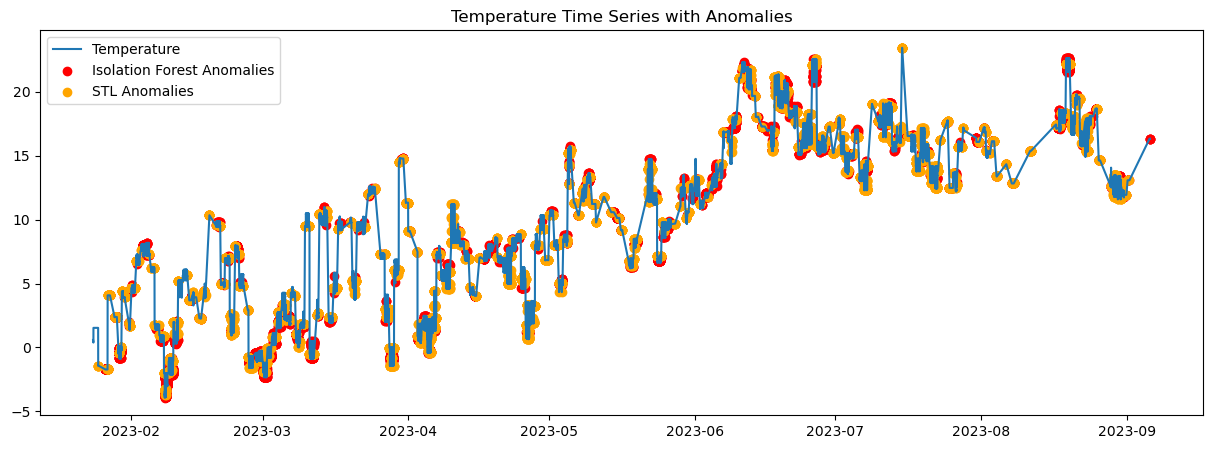

In [123]:
# Visualize anomalies
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['temperature'], label='Temperature')
plt.scatter(df[df['anomaly_iforest'] == -1].index, df[df['anomaly_iforest'] == -1]['temperature'], color='red', label='Isolation Forest Anomalies')
plt.scatter(df[df['anomaly_stl']].index, df[df['anomaly_stl']]['temperature'], color='orange', label='STL Anomalies')
plt.title('Temperature Time Series with Anomalies')
plt.legend()
plt.show()

## K-means Clustering

In [187]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [188]:
df_time.columns

Index(['lat', 'lon', 'temperature', 'elevation', 'precipitations',
       'snow_height', 'RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2',
       'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1',
       'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
       'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'Sensors_NB_Fail_PC1',
       'Sensors_NB_Fail_PC2', 'OutOfRange_NB_PC1', 'OutOfRange_NB_PC2',
       'Distance', 'IsMoving', 'MovingSpeed', 'Slope', 'VerticalDisplacement',
       'RS_E_InAirTemp_Delta', 'RS_E_OilPress_Delta', 'RS_E_RPM_Delta',
       'RS_E_WatTemp_Delta', 'RS_T_OilTemp_Delta', 'month', 'hour',
       'dayOfWeek', 'quarter', 'timeOfDay'],
      dtype='object')

In [193]:
# Take useful feature and standardize them
df_time['InAirTemp_PC1_above'] = df_time['RS_E_InAirTemp_PC1'] - df_time['temperature']
df_time['InAirTemp_PC2_above'] = df_time['RS_E_InAirTemp_PC2'] - df_time['temperature']
interesting_features = [
       'InAirTemp_PC1_above','InAirTemp_PC2_above','elevation',
       'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1',
       'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2',
       'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'MovingSpeed', 'Slope', 'VerticalDisplacement',
       'RS_E_InAirTemp_Delta', 'RS_E_OilPress_Delta', 'RS_E_RPM_Delta',
       'RS_E_WatTemp_Delta', 'RS_T_OilTemp_Delta', 'month', 'hour',
       'dayOfWeek', 'quarter', 'timeOfDay']

data = df_time[interesting_features]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 3 importants features
pca = PCA(n_components=3)
data = pca.fit_transform(data)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
data

,0,1,2
0,3.217727,-1.960746,-0.834691
1,2.117262,-0.155514,-0.999522
2,0.956984,1.888723,-1.326234
3,0.936568,2.027642,-1.375660
4,3.268622,-2.027202,-0.808867
...,...,...,...
169921,4.196592,-0.309419,-0.712216
169922,4.206517,-0.265963,-0.749815
169923,4.190978,-0.288919,-0.765511
169924,4.191032,-0.289073,-0.765540


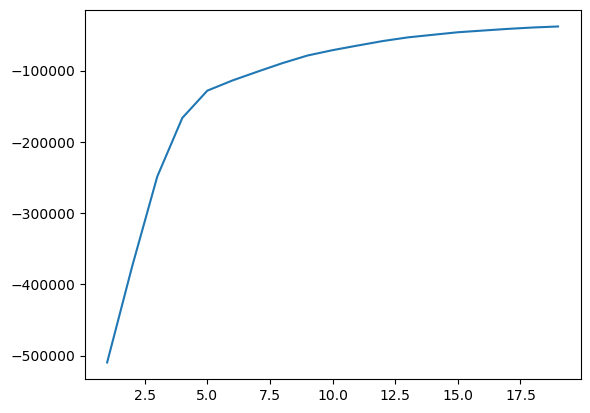

In [194]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [202]:
df_time['cluster'] = kmeans[14].predict(data)
df_time['principal_feature1'] = data[0]
df_time['principal_feature2'] = data[1]

In [223]:
df_time['cluster'] = kmeans[14].predict(data)
data[0].index = df_time.index
data[1].index = df_time.index
data[2].index = df_time.index
df_time['principal_feature1'] = data[0]
df_time['principal_feature2'] = data[1]
df_time['principal_feature3'] = data[2]
df_time['cluster'].value_counts()

4     30798
8     30623
2     22741
14    18990
5     15413
0     13584
6     10180
12     8883
1      6197
10     3090
11     2558
13     2553
3      1638
7      1396
9      1282
Name: cluster, dtype: int64

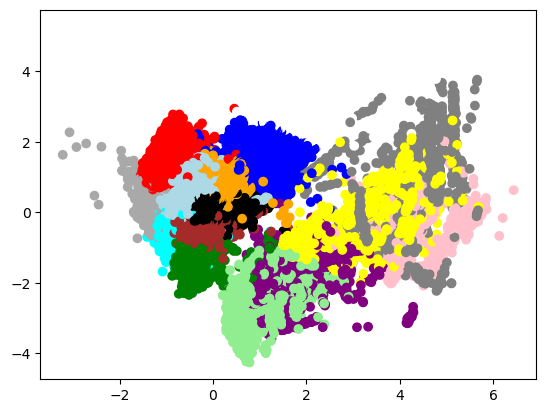

In [225]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df_time['principal_feature1'], df_time['principal_feature3'], c=df_time["cluster"].apply(lambda x: colors[x]))
plt.show()

In [248]:
from sklearn.metrics import pairwise_distances_argmin_min

principal_features = df_time[['principal_feature1','principal_feature2','principal_feature3']]

# Get centroids
centroids = kmeans[14].cluster_centers_

# Calculate distances to the nearest centroid for each data point
df_time['DistanceToNearestCentroid'] = pairwise_distances_argmin_min(principal_features, centroids)[1]

#Set a threshold for anomaly detection (e.g., consider top 5% as anomalies)
threshold_percentile = 95
threshold_distance = pd.Series(df_time['DistanceToNearestCentroid']).quantile(threshold_percentile / 100)

# Identify anomalies based on the threshold distance
anomalies = df_time[df_time['DistanceToNearestCentroid'] > threshold_distance]

# Display or further analyze the anomalies
df_time['anomalies'] = df_time['DistanceToNearestCentroid'] > threshold_distance
df_time['anomalies'] 

timestamps_UTC
2023-01-23 22:00:00    False
2023-01-23 22:01:00     True
2023-01-23 22:02:00     True
2023-01-23 22:03:00     True
2023-01-23 22:04:00    False
                       ...  
2023-09-13 21:43:00     True
2023-09-13 21:44:00     True
2023-09-13 21:45:00     True
2023-09-13 21:46:00     True
2023-09-13 21:47:00     True
Name: anomalies, Length: 169926, dtype: bool

In [249]:
df_time['RS_E_RPM_PC1']

timestamps_UTC
2023-01-23 22:00:00    0.0
2023-01-23 22:01:00    0.0
2023-01-23 22:02:00    0.0
2023-01-23 22:03:00    0.0
2023-01-23 22:04:00    0.0
                      ... 
2023-09-13 21:43:00    0.0
2023-09-13 21:44:00    0.0
2023-09-13 21:45:00    0.0
2023-09-13 21:46:00    0.0
2023-09-13 21:47:00    0.0
Name: RS_E_RPM_PC1, Length: 169926, dtype: float64

In [265]:
import plotly.express as px 

# Set the timeframe for one month (adjust as needed)
start_date = '2023-01-29'
end_date = '2023-03-01'

# Filter data for one month
df_one_month = df_time[(df_time.index >= start_date) & (df_time.index < end_date)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create an interactive time series plot with anomalies highlighted
fig = px.line(df_one_month, x=df_one_month.index, y='RS_E_RPM_PC1', title='Time Series with Anomalies (One Month)',
              labels={'YourFeature': 'Your Feature'}, line_shape='linear')

# Highlight anomalies
anomalies_fig = px.scatter(df_one_month[df_one_month['anomalies']], x=df_one_month[df_one_month['anomalies']].index,
                           y='RS_E_RPM_PC1', title='Anomalies', labels={'RS_E_RPM_PC1': 'Your Feature'},
                           color='anomalies', color_discrete_map={True: 'red'}, hover_data=['anomalies'])

# Add anomalies trace to the main figure
fig.add_trace(anomalies_fig.data[0])

# Show the plot
fig.show()

<Figure size 1200x600 with 0 Axes>

Conclusion: It doesnt seem to work very good. 
- Big block of anomalies detected in 29/01. 
- Sparse anomlaies everywhere
- Too much anomalies

We need to know more what type of anomalies we want to detect (in a graph). 

For example, 
- When the difference between Temp_air and Temp is strange
- When is PRess_Delta is abnormal
- RPM1 vs RPM2 -> pattern not seen before
- 